<a href="https://www.kaggle.com/code/dibkb9/disaster-tweets?scriptVersionId=172621770" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [2]:
# Check for GPU
!nvidia-smi -L

/bin/bash: nvidia-smi: command not found


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn-whitegrid")

/tmp/ipykernel_19/1948985775.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [4]:
train_df = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
test_df = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
print(f"Total training samples: {len(train_df)}")
print(f"Total test samples: {len(test_df)}")
print(f"Total samples: {len(train_df) + len(test_df)}")

Total training samples: 7613
Total test samples: 3263
Total samples: 10876


Total no of disaster tweets:  4342
Percent of disaster tweets:  57.03%


Total no of non-disaster tweets:  3271
Percent of non-disaster tweets:  42.97%


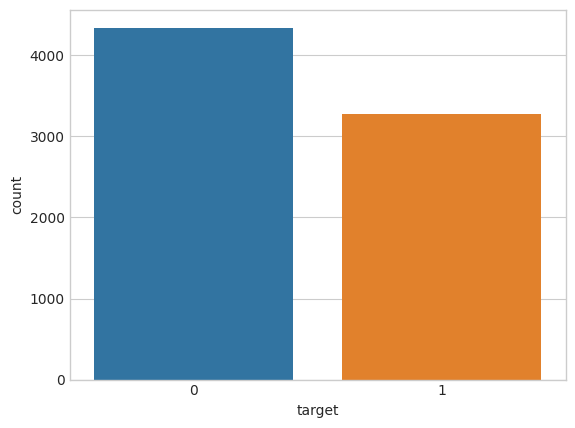

In [6]:
sns.countplot(train_df, x="target")
cnt = train_df['target'].value_counts()
print("Total no of disaster tweets: ",cnt[0])
print("Percent of disaster tweets: ",f'{cnt[0]/len(train_df)*100:.2f}%')
print("\n")
print("Total no of non-disaster tweets: ",cnt[1])
print("Percent of non-disaster tweets: ",f'{cnt[1]/len(train_df)*100:.2f}%')

In [7]:
import random
start_range = 0
end_range = len(train_df)
random_list = list(random.sample(range(start_range, end_range + 1), 6))
for i in random_list:
    row = train_df.iloc[i]
    print("Label ", row['target'], "(real disaster)" if row['target'] == 1 else "(not real disaster)")
    print("Text \n",row['text'])
    print("--"*21,'\n')
    

Label  0 (not real disaster)
Text 
 http://t.co/PmHMmkSPaQ -PANDEMONIUM! Playstation One PS1 Retro Classic Original Platform Platinum Rare#Deals_UK http://t.co/0gKNpy4lUA
------------------------------------------ 

Label  0 (not real disaster)
Text 
 #IranDeal most members of Congress who don't want this deal don't have any kids who would b coming home in body bags. War makes them money
------------------------------------------ 

Label  1 (real disaster)
Text 
 you can stab me in the back but I promise you'll be the one bleeding
------------------------------------------ 

Label  0 (not real disaster)
Text 
 @editaxohaze then let the bagging body's begin lol ???? I ain't cuffed yet so it shouldn't be that bad!!
------------------------------------------ 

Label  0 (not real disaster)
Text 
 Black Eye 9: A space battle occurred at Star O784 involving 3 fleets totaling 3945 ships with 17 destroyed
------------------------------------------ 

Label  1 (real disaster)
Text 
 California m

In [8]:
train_df.iloc[1]

id                                               4
keyword                                        NaN
location                                       NaN
text        Forest fire near La Ronge Sask. Canada
target                                           1
Name: 1, dtype: object

#### Number of characters present in each tweet

<Axes: >

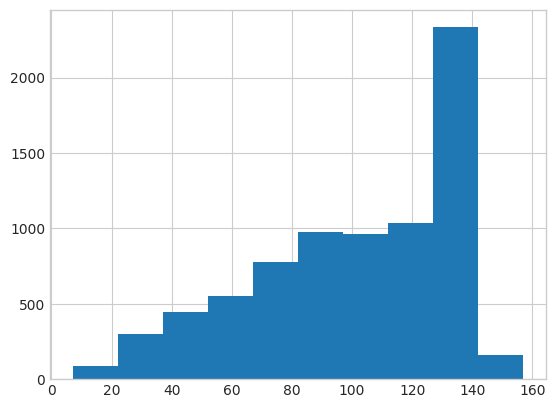

In [9]:
train_df['text'].str.len().hist()

In [10]:
train_df['char_len'] = train_df['text'].apply(len)

In [11]:
train_df

,id,keyword,location,text,target,char_len
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137


Text(0.5, 1.0, 'Disaster tweets')

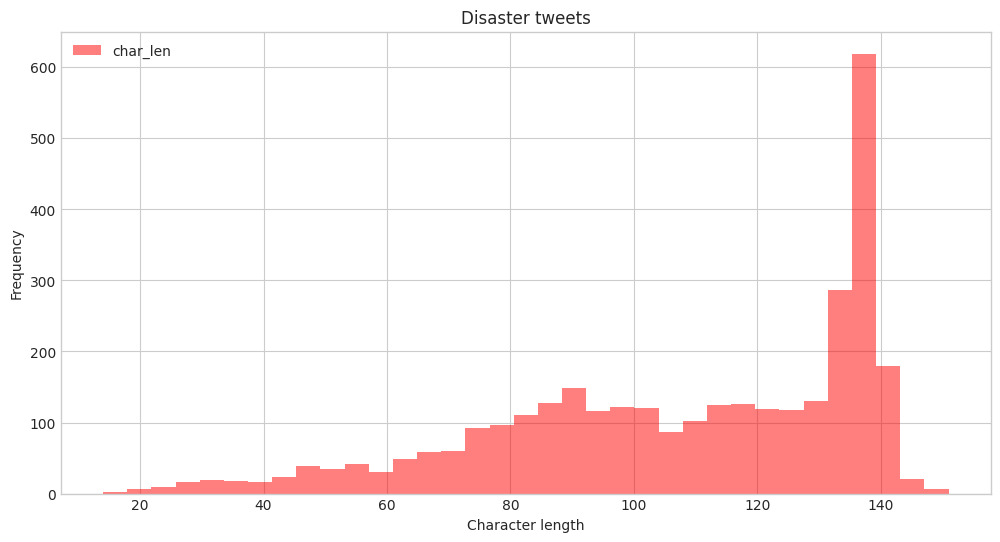

In [12]:
plt.figure(figsize=(12, 6))
train_df[train_df['target']==1]['char_len'].plot(bins=35, kind='hist', color='red',alpha=.5)
plt.legend()
plt.xlabel("Character length")
plt.title("Disaster tweets")

Text(0.5, 1.0, 'Non Disaster tweets')

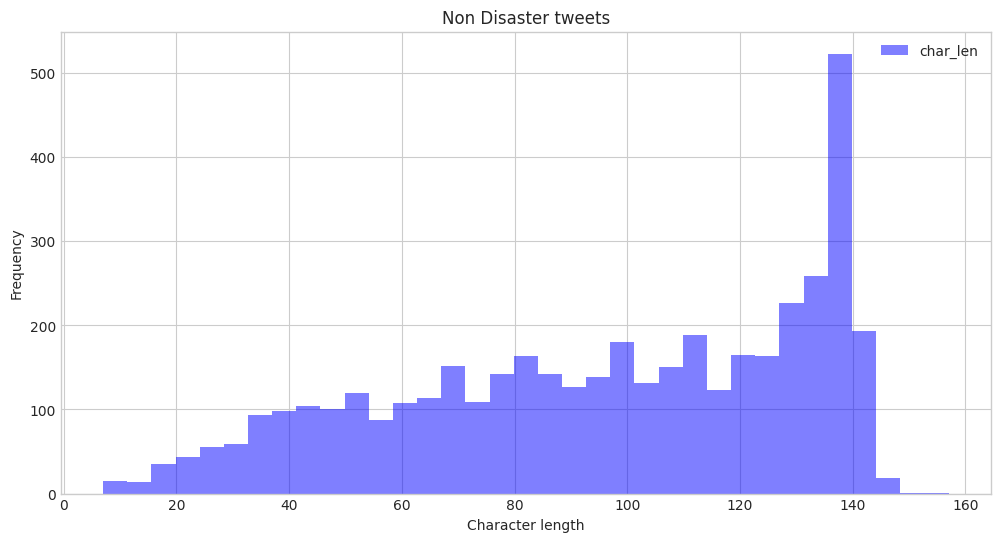

In [13]:
plt.figure(figsize=(12, 6))
train_df[train_df['target']==0]['char_len'].plot(bins=35, kind='hist', color='blue',alpha=.5)
plt.legend()
plt.xlabel("Character length")
plt.title("Non Disaster tweets")

#### Number of words present in each tweet

In [14]:
train_df['word_len'] = train_df['text'].str.split().map(lambda x: len(x))

<Axes: >

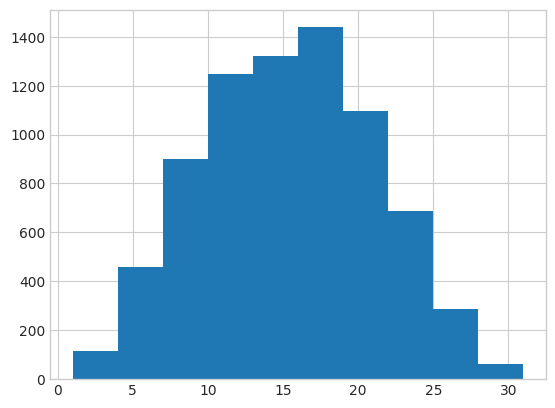

In [15]:
train_df['text'].str.split().map(lambda x: len(x)).hist()

Text(0.5, 1.0, 'Disaster tweets')

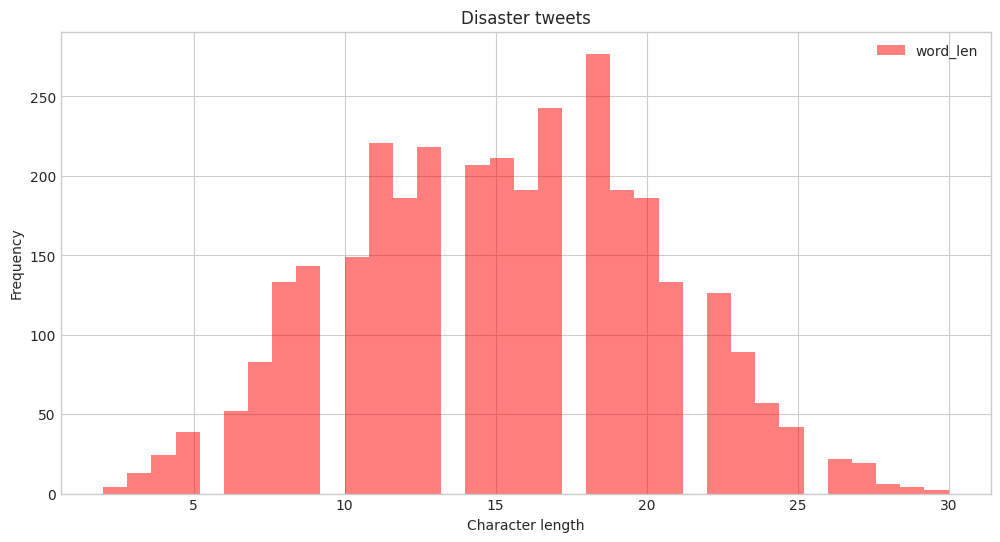

In [16]:
plt.figure(figsize=(12, 6))
train_df[train_df['target']==1]['word_len'].plot(bins=35, kind='hist', color='red',alpha=0.5)
plt.legend()
plt.xlabel("Character length")
plt.title("Disaster tweets")

Text(0.5, 1.0, 'Non Disaster tweets')

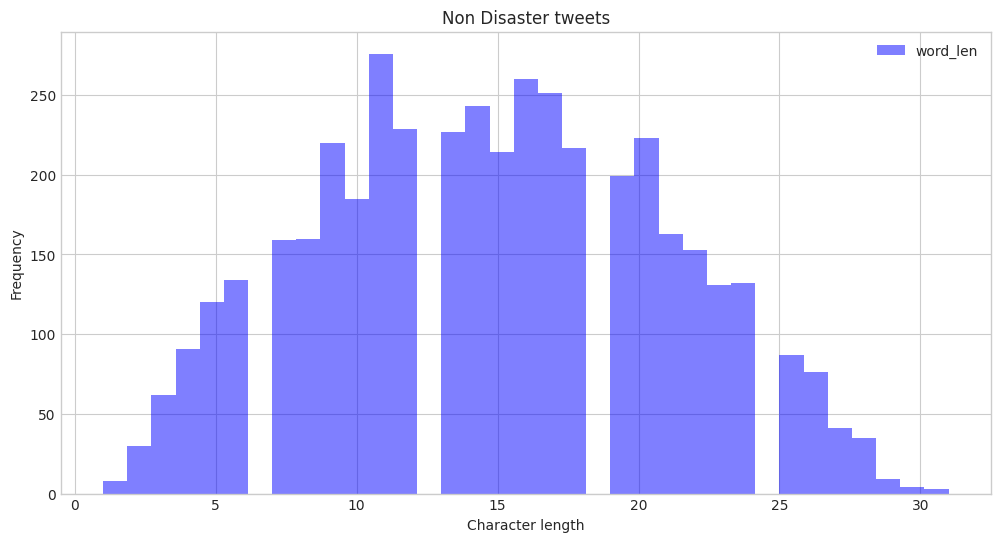

In [17]:
plt.figure(figsize=(12, 6))
train_df[train_df['target']==0]['word_len'].plot(bins=35, kind='hist', color='blue',alpha=0.5)
plt.legend()
plt.xlabel("Character length")
plt.title("Non Disaster tweets")

#### Descriptive Statistics

In [18]:
print("Disaster tweets \n")
train_df[['char_len', 'word_len']][train_df.target==1].describe().T

Disaster tweets 



,count,mean,std,min,25%,50%,75%,max
char_len,3271.0,108.113421,29.309854,14.0,88.0,115.0,136.0,151.0
word_len,3271.0,15.167533,5.096806,2.0,11.0,15.0,19.0,30.0


In [19]:
print("Non Disaster tweets \n")
train_df[['char_len', 'word_len']][train_df.target==0].describe().T

Non Disaster tweets 



,count,mean,std,min,25%,50%,75%,max
char_len,4342.0,95.706817,35.885924,7.0,68.0,101.0,130.0,157.0
word_len,4342.0,14.704744,6.161564,1.0,10.0,15.0,19.0,31.0


In [20]:
train_df['contains_link'] = train_df['text'].str.contains("https")
contains_link = train_df[(train_df["contains_link"] == True)]['target'].value_counts()
print("Disaster tweets that contains a link in the text body ", contains_link[1],'\n')
print("Non Disaster tweets that contains a link in the text body ", contains_link[0],'\n')

Disaster tweets that contains a link in the text body  134 

Non Disaster tweets that contains a link in the text body  273 



#### Stop words

In [21]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
corpus=[]
text = train_df['text'].str.split()
text = text.values.tolist()
corpus=[word for i in text for word in i]

from collections import defaultdict
dic=defaultdict(int)
non_dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
    if word not in stop:
        non_dic[word]+=1

In [23]:
stop_words_cnt = pd.DataFrame(list(dic.items()), columns=['word', 'count'])
nonstop_words_cnt = pd.DataFrame(list(non_dic.items()), columns=['word', 'count'])

In [24]:
def plotwords(df,cnt=15):
    df = df.sort_values(by='count', ascending=False)[:cnt]
    plt.figure(figsize=(18, 6))
    sns.barplot(x='word', y='count', data=df)
    # Add labels to the bars
    ax = plt.gca()
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()), 
                fontsize=12, color='black', ha='center', va='bottom')

    # Customize plot
    plt.xlabel('Word', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Show plot
    plt.tight_layout()
    plt.show()

#### Top 15 stop words

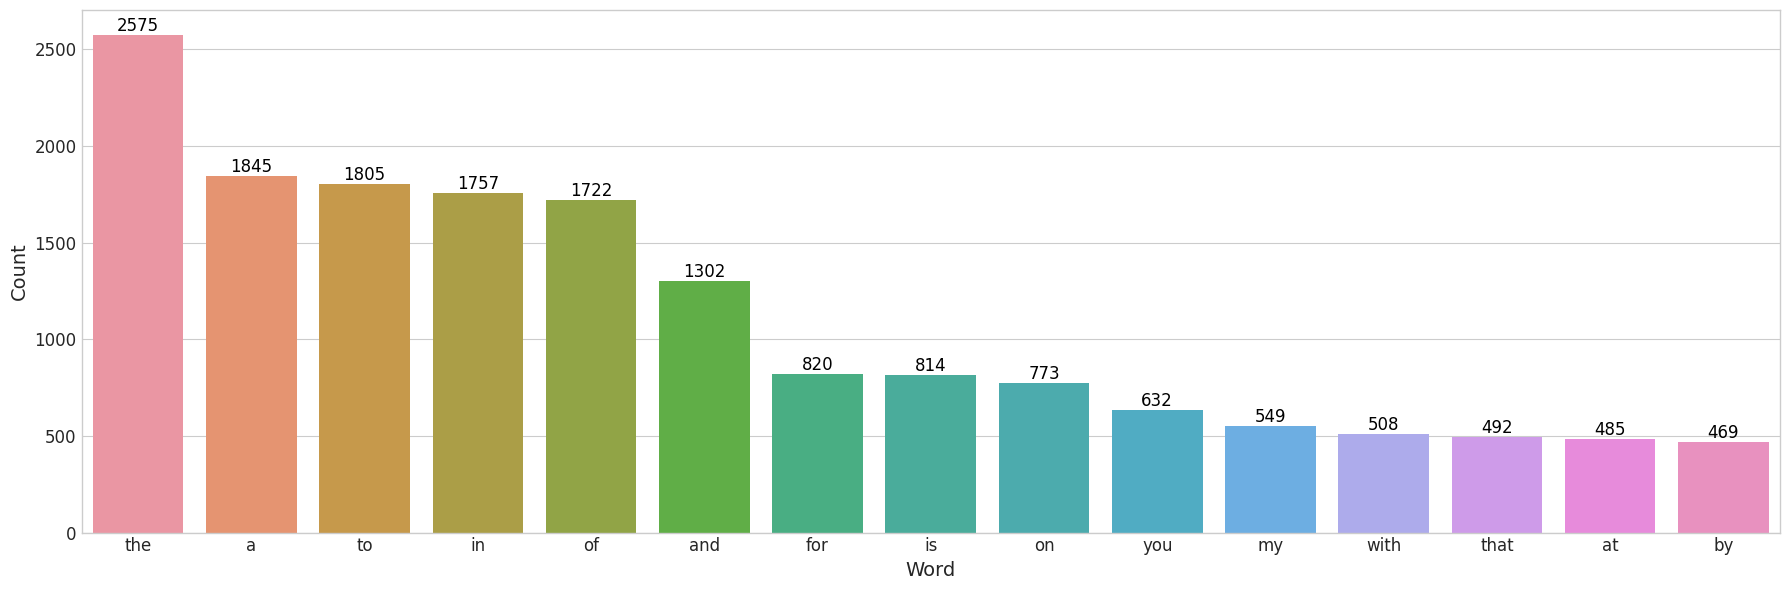

In [25]:
plotwords(stop_words_cnt)

#### Top 15 non-stop words

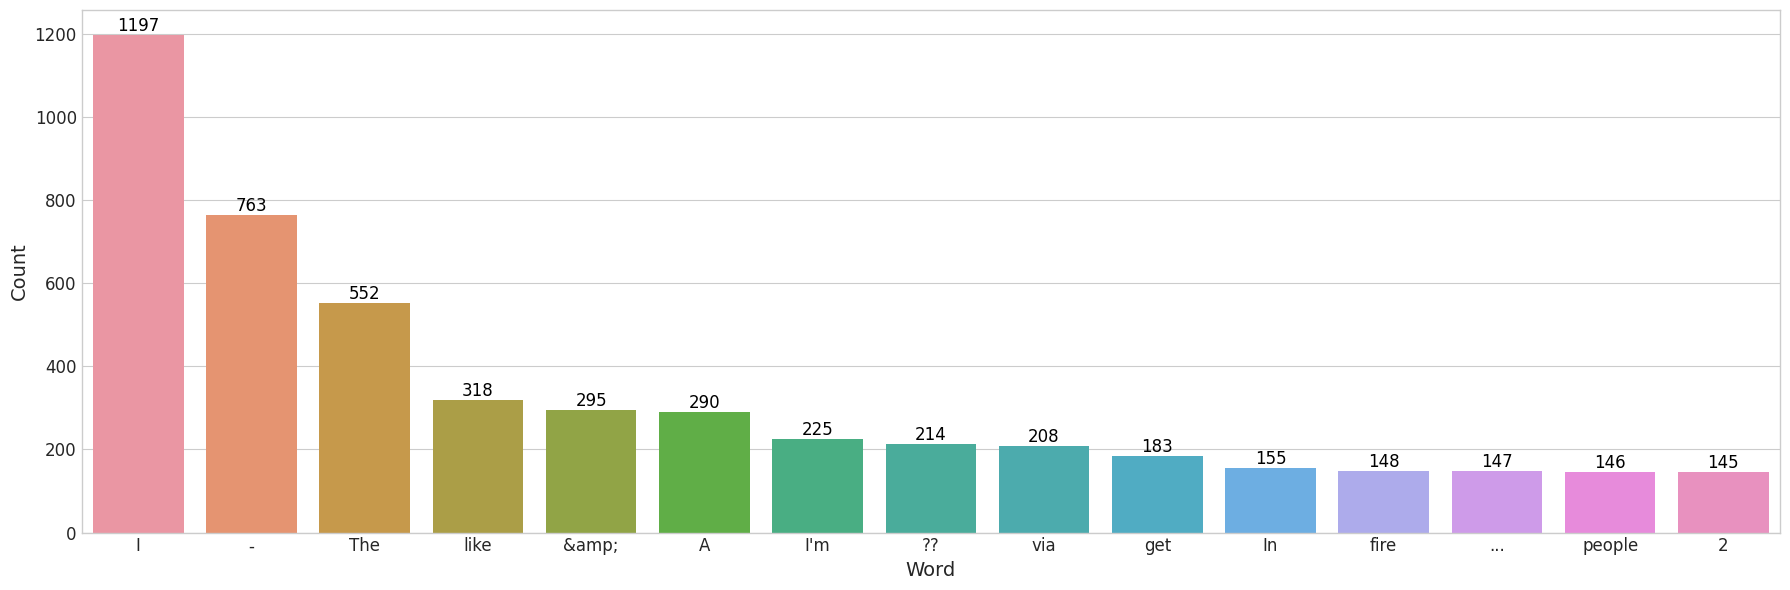

In [26]:
plotwords(nonstop_words_cnt)

In [27]:
# Preprocess text (username and link placeholders)
def preprocess(text):
    new_text = []

    for t in text.split(" "):
        t = '' if t.startswith('@') and len(t) > 1 else t
        t = '' if t.startswith('http') else t
        t = t.replace("#","")
        new_text.append(t.lower())
    return " ".join(new_text).strip().replace("  ", " ")

In [28]:
train_df['text'] = train_df['text'].apply(preprocess)
test_df['text'] = test_df['text'].apply(preprocess)
train_df.head()

,id,keyword,location,text,target,char_len,word_len,contains_link
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1,69,13,False
1,4,NaN,NaN,forest fire near la ronge sask. canada,1,38,7,False
2,5,NaN,NaN,all residents asked to 'shelter in place' are ...,1,133,22,False
3,6,NaN,NaN,"13,000 people receive wildfires evacuation ord...",1,65,8,False
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1,88,16,False


##### Remove html tags (if any)

In [29]:
from bs4 import BeautifulSoup

In [30]:
def remove_html_tags(text):
    return BeautifulSoup(text, 'html.parser').get_text()

train_df['text'] = train_df['text'].apply(remove_html_tags)
test_df['text'] = test_df['text'].apply(remove_html_tags)

/tmp/ipykernel_19/3375023448.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, 'html.parser').get_text()


##### Standardizing Accent Characters

In [31]:
import unicodedata
def standardize_accented_chars(text):
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

train_df['text'] = train_df['text'].apply(standardize_accented_chars)
test_df['text'] = test_df['text'].apply(standardize_accented_chars)

In [32]:
import re 

def remove_url(text):
    return re.sub(r'https?:\S*', '', text)
train_df['text'] = train_df['text'].apply(remove_url)
test_df['text'] = test_df['text'].apply(remove_url)

##### Expanding contractions

In [33]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 5.7 MB/s eta 0:00:00


In [34]:
import contractions
def expand_contractions(text):
    expanded_words = [] 
    for word in text.split():
        expanded_words.append(contractions.fix(word)) 
    return ' '.join(expanded_words)

train_df['text'] = train_df['text'].apply(expand_contractions)
test_df['text'] = test_df['text'].apply(expand_contractions)

#### Removing tags and mentions

In [35]:
def remove_mentions_and_tags(text):
    text = re.sub(r'@\S*', '', text)
    return re.sub(r'#\S*', '', text)

train_df['text'] = train_df['text'].apply(remove_mentions_and_tags)
test_df['text'] = test_df['text'].apply(remove_mentions_and_tags)

##### Removing Special Characters

In [36]:
def remove_special_characters(text):
    # define the pattern to keep
    pat = r'[^a-zA-z0-9.,!?/:;\"\'\s]' 
    return re.sub(pat, '', text)

train_df['text'] = train_df['text'].apply(remove_special_characters)
test_df['text'] = test_df['text'].apply(remove_special_characters)

##### Removing Digits

In [37]:
def remove_numbers(text):
    pattern = r'[^a-zA-z.,!?/:;\"\'\s]' 
    return re.sub(pattern, '', text)

train_df['text'] = train_df['text'].apply(remove_numbers)
test_df['text'] = test_df['text'].apply(remove_numbers)

##### Removing Puncuations

In [38]:
import string
def remove_punctuation(text):
    return ''.join([c for c in text if c not in string.punctuation])

train_df['text'] = train_df['text'].apply(remove_punctuation)
test_df['text'] = test_df['text'].apply(remove_punctuation)

##### Lemmatisaton

In [39]:
import spacy
nlp = spacy.load("en_core_web_sm")
def lemmatize(text):
    doc = nlp(text)
    lemmatized_text = []
    for token in doc:
        lemmatized_text.append(token.lemma_)
    return " ".join(lemmatized_text)
train_df['text'] = train_df['text'].apply(lemmatize)
test_df['text'] = test_df['text'].apply(lemmatize)

In [40]:
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
def remove_stopwords(text):       
    filtered_sentence =[] 
    doc=nlp(text)
    for token in doc:
        if token.is_stop == False: 
            filtered_sentence.append(token.text)   
    return " ".join(filtered_sentence)

train_df['text'] = train_df['text'].apply(remove_stopwords)
test_df['text'] = test_df['text'].apply(remove_stopwords)

#### Train-val split

In [41]:
from sklearn.model_selection import train_test_split
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df["text"].to_numpy(),
                                                                            train_df["target"].to_numpy(),
                                                                            test_size=0.1,
                                                                            random_state=42) 

In [42]:
train_sentences

array(['mcfadden reportedly test hamstring thursday',
       'w nema warn nigerians prepare drought',
       'cook early electrocute crucial    psychic lol', ...,
       'omron hemc automatic blood pressure monitor standard large bp cuff',
       'official quarantine place alabama home possible ebola case develop symptom',
       'england year ago today whirlwind time'], dtype=object)

#### Vectorization and Embeddings

In [43]:
# average words
avg_words = round(train_df[['char_len', 'word_len']][train_df.target==1].describe()['word_len']['mean'])
avg_words

15

In [44]:
import tensorflow as tf
from keras.layers import TextVectorization
max_vocab_length = 10000
text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=avg_words)

2024-04-18 06:48:52.324980: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-18 06:48:52.325181: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-18 06:48:52.491370: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [45]:
text_vectorizer.adapt(train_sentences)

In [46]:
# Create sample sentence and tokenize it
example_sentences = ["Just felt a huge earthquake. Stay safe everyone! #earthquake #safety",
                     "Evacuation orders issued as wildfire approaches our neighborhood. Praying for everyone's safety. #wildfire #evacuation",
                     "Massive flooding in the area. Roads are impassable. Stay indoors and stay safe. #flood #safety"]
for s in example_sentences:
    print(s,'\n')
    print(text_vectorizer([s]),'\n')
    print("-"*64,'\n')

Just felt a huge earthquake. Stay safe everyone! #earthquake #safety 

tf.Tensor(
[[   1    1    1  632  151  369 1272    1  151  735    0    0    0    0
     0]], shape=(1, 15), dtype=int64) 

---------------------------------------------------------------- 

Evacuation orders issued as wildfire approaches our neighborhood. Praying for everyone's safety. #wildfire #evacuation 

tf.Tensor(
[[ 176 2217    1    1   70    1    1 3876    1    1    1  735   70  176
     0]], shape=(1, 15), dtype=int64) 

---------------------------------------------------------------- 

Massive flooding in the area. Roads are impassable. Stay indoors and stay safe. #flood #safety 

tf.Tensor(
[[1301  375    1    1  212    1    1    1  369    1    1  369 1272   26
   735]], shape=(1, 15), dtype=int64) 

---------------------------------------------------------------- 



In [47]:
tf.random.set_seed(42)
from keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             embeddings_initializer="uniform",
                             input_shape=(avg_words,),
                             name="embedding_1") 

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [48]:
for s in example_sentences:
    print(s,'\n')
    print(embedding(text_vectorizer([s])),'\n')
    print("-"*64,'\n')

Just felt a huge earthquake. Stay safe everyone! #earthquake #safety 

tf.Tensor(
[[[-0.00720805  0.00372498 -0.04188845 ...  0.03775201  0.03699857
    0.01838756]
  [-0.00720805  0.00372498 -0.04188845 ...  0.03775201  0.03699857
    0.01838756]
  [-0.00720805  0.00372498 -0.04188845 ...  0.03775201  0.03699857
    0.01838756]
  ...
  [-0.03405922  0.02214453  0.03025467 ... -0.01609731  0.02368834
   -0.01675334]
  [-0.03405922  0.02214453  0.03025467 ... -0.01609731  0.02368834
   -0.01675334]
  [-0.03405922  0.02214453  0.03025467 ... -0.01609731  0.02368834
   -0.01675334]]], shape=(1, 15, 128), dtype=float32) 

---------------------------------------------------------------- 

Evacuation orders issued as wildfire approaches our neighborhood. Praying for everyone's safety. #wildfire #evacuation 

tf.Tensor(
[[[-0.03086709 -0.02274079  0.02887313 ...  0.00467902 -0.02135459
    0.00032712]
  [-0.0349384  -0.01023065  0.01471193 ... -0.04531152  0.04274193
   -0.04076353]
  [-0.007

### Modeling experiments

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_one = Pipeline([
                    ("tfidf", TfidfVectorizer()),
                    ("clf", MultinomialNB())
])

model_one.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [50]:
baseline_score = model_one.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.13%


In [51]:
sample_submission = pd.read_csv("/kaggle/input/nlp-getting-started/sample_submission.csv")
sample_submission.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [52]:
test_sentences = test_df["text"].to_numpy()

In [53]:
sample_submission["target"] = model_one.predict(test_sentences)

In [54]:
sample_submission.head()

,id,target
0,0,1
1,2,0
2,3,1
3,9,1
4,11,1


In [55]:
sample_submission.describe()

,id,target
count,3263.000000,3263.000000
mean,5427.152927,0.342323
std,3146.427221,0.474560
min,0.000000,0.000000
25%,2683.000000,0.000000
50%,5500.000000,0.000000
75%,8176.000000,1.000000
max,10875.000000,1.000000


In [56]:
sample_submission.to_csv("submission.csv", index=False)

In [57]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
    model_accuracy = accuracy_score(y_true, y_pred) * 100
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
    model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
    return model_results


In [58]:
model_one_preds = model_one.predict(val_sentences)
model_one_results = calculate_results(y_true=val_labels,y_pred=model_one_preds)
model_one_results

{'accuracy': 79.13385826771653,
 'precision': 0.7969313590653059,
 'recall': 0.7913385826771654,
 'f1': 0.7872165500436467}

#### Model Two (ANN)

In [59]:
from keras.models import Sequential
from keras.layers import InputLayer,GlobalAveragePooling1D, Dense
model_two = Sequential([
    InputLayer(shape=(1,), dtype="string"),
    text_vectorizer,
    embedding,
    GlobalAveragePooling1D(),
    Dense(1, activation="sigmoid")
])

model_two.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [60]:
#get the model summary
model_two.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization              │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,280,129 (4.88 MB)

 Trainable params: 1,280,129 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
# Fit the model
model_two_history = model_two.fit(train_sentences, # input sentences can be a list of strings due to text preprocessing layer built-in model
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5987 - loss: 0.6582 - val_accuracy: 0.7310 - val_loss: 0.5674
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7852 - loss: 0.5048 - val_accuracy: 0.7913 - val_loss: 0.4806
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8506 - loss: 0.3761 - val_accuracy: 0.7940 - val_loss: 0.4760
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8763 - loss: 0.3072 - val_accuracy: 0.7861 - val_loss: 0.4916
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8977 - loss: 0.2587 - val_accuracy: 0.7861 - val_loss: 0.5140


<Axes: >

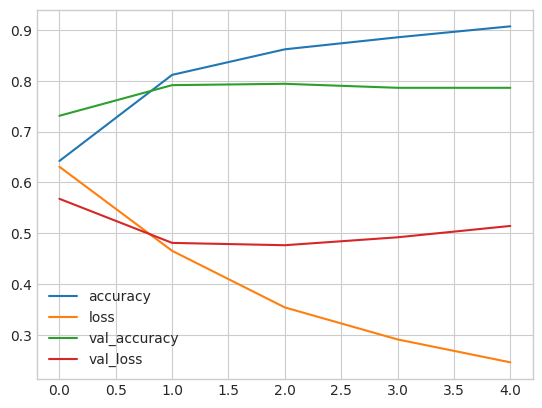

In [62]:
pd.DataFrame(model_two_history.history).plot()

In [63]:
# Check the results
model_two.evaluate(val_sentences, val_labels)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7888 - loss: 0.5127 


[0.5139821171760559, 0.7860892415046692]

In [64]:
model_two_preds = tf.squeeze(tf.round(model_two.predict(val_sentences)))
model_two_results = calculate_results(y_true=val_labels, 
                                    y_pred=model_two_preds)
model_two_results

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


{'accuracy': 78.60892388451444,
 'precision': 0.7874027268424406,
 'recall': 0.7860892388451444,
 'f1': 0.7836378548343303}

#### Model Three (LSTM)

In [65]:
from keras.models import Sequential,Model
from keras.layers import Input,GlobalAveragePooling1D, Dense,LSTM,GRU

In [66]:
model_two_embedding = layers.Embedding(input_dim = max_vocab_length, output_dim = 128, input_shape = (avg_words,1),embeddings_initializer="uniform",)

inputs = Input(shape = (1,), dtype="string")
x = text_vectorizer(inputs)
x = model_two_embedding(x)
# x = layers.LSTM(64,return_sequences = True)(x)
x = LSTM(64)(x)
x = Dense(128,activation="relu")(x)
outputs = Dense(1,activation="sigmoid")(x)
model_three = Model(inputs,outputs,name = "LSTM")

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [67]:
model_three.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model_three.fit(train_sentences,train_labels,epochs=5,validation_data = (val_sentences,val_labels))

Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.6615 - loss: 0.5999 - val_accuracy: 0.7927 - val_loss: 0.4784
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8611 - loss: 0.3409 - val_accuracy: 0.7690 - val_loss: 0.5267
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9150 - loss: 0.2292 - val_accuracy: 0.7625 - val_loss: 0.6457
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9523 - loss: 0.1449 - val_accuracy: 0.7651 - val_loss: 0.8279
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9584 - loss: 0.1283 - val_accuracy: 0.7507 - val_loss: 0.8694


In [68]:
def get_model_results(model):
    model_preds = tf.squeeze(tf.round(model.predict(val_sentences)))
    model_results = calculate_results(y_true=val_labels,y_pred=model_preds)
    return model_results

In [69]:
model_three_results = get_model_results(model_three)
model_three_results

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


{'accuracy': 75.06561679790026,
 'precision': 0.7498147383159004,
 'recall': 0.7506561679790026,
 'f1': 0.7492024835828328}

#### Model Four (GRU)

In [70]:
model_four_embedding = layers.Embedding(input_dim = max_vocab_length, output_dim = 128, input_shape = (avg_words,1),embeddings_initializer="uniform",)

inputs = Input(shape = (1,),dtype="string")
x = text_vectorizer(inputs)
x = model_four_embedding(x)
x = GRU(64)(x)
outputs = Dense(1,activation='sigmoid')(x)

model_four = Model(inputs,outputs,name = "gru")

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [71]:
model_four.compile(loss = "binary_crossentropy",optimizer = "adam",metrics = ['accuracy'])

In [72]:
model_four_history = model_four.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.6181 - loss: 0.6322 - val_accuracy: 0.7808 - val_loss: 0.4736
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.8434 - loss: 0.3705 - val_accuracy: 0.7822 - val_loss: 0.5249
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9036 - loss: 0.2485 - val_accuracy: 0.7651 - val_loss: 0.6305
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9351 - loss: 0.1912 - val_accuracy: 0.7493 - val_loss: 0.7238
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9494 - loss: 0.1573 - val_accuracy: 0.7480 - val_loss: 0.7843


In [73]:
model_four_results = get_model_results(model_four)
model_four_results

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


{'accuracy': 74.80314960629921,
 'precision': 0.7487727242061806,
 'recall': 0.7480314960629921,
 'f1': 0.748319500207442}

#### Model Five (Fine tuning BERT)

In [74]:
import transformers
from transformers import BertTokenizer
from transformers import TFAutoModel
import tensorflow as tf

In [75]:
def map_func(input_ids, masks, labels):
    return {
        'input_ids': input_ids,
        'attention_mask': masks
    }, labels

In [76]:
seq_len = 256
batch_size = 16
num_samples = len(train_df)
model_name = 'cardiffnlp/twitter-roberta-base-sentiment'

def prepare_dataset(model_name):
    tokenizer = transformers.AutoTokenizer.from_pretrained(model_name)

    train_tokens = tokenizer(
    train_df['text'].tolist(), 
    max_length=seq_len, 
    truncation=True, 
    padding='max_length', 
    add_special_tokens=True, 
    return_tensors='np'
    )
    
    y_train = train_df['target'].values
    labels = np.zeros((num_samples, y_train.max() + 1))
    labels[np.arange(num_samples), y_train] = 1
    
    dataset = tf.data.Dataset.from_tensor_slices(
    (
        train_tokens['input_ids'], 
        train_tokens['attention_mask'], 
        labels
    )
    )

    dataset = dataset.map(map_func)
    dataset = dataset.shuffle(10000).batch(batch_size=batch_size, drop_remainder=True)

    split = 0.7
    size = int((train_tokens['input_ids'].shape[0] // batch_size) * split)

    train_ds = dataset.take(size)
    val_ds = dataset.skip(size)
    return (train_ds,val_ds)

In [77]:
# (train_ds,val_ds) = prepare_dataset(model_name)

In [78]:
def create_model(model_name):
    model = TFAutoModel.from_pretrained(model_name)
    
    # Two inputs
    input_ids = tf.keras.layers.Input(shape=(seq_len,), name='input_ids', dtype='int32')
    mask = tf.keras.layers.Input(shape=(seq_len,), name='attention_mask', dtype='int32')
    
    # embeddings = model.bert(input_ids, attention_mask=mask)[1]
    embeddings = model(input_ids, attention_mask=mask)[0]
    cls_token = embeddings[:, 0, :]
    
    # Classifier head
    x = tf.keras.layers.BatchNormalization()(cls_token)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.Dense(32, activation='relu')(x)
    y = tf.keras.layers.Dense(2, activation='softmax', name='outputs')(x)
    
    bert_model = tf.keras.Model(inputs=[input_ids, mask], outputs=y)
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
    loss = tf.keras.losses.CategoricalCrossentropy()
    acc = tf.keras.metrics.BinaryAccuracy()
    
    bert_model.compile(optimizer=optimizer, loss=loss, metrics=[acc])
    
    return bert_model

In [79]:
# bert_model = create_model(model_name)
# callbacks = [tf.keras.callbacks.ReduceLROnPlateau(patience=2, factor=0.1,min_delta=0.001,monitor='val_loss'),
#              tf.keras.callbacks.EarlyStopping(patience=5, min_delta=0.001, monitor='val_loss')]


In [80]:
# model_five_history = bert_model.fit(
#     train_ds,
#     validation_data = val_ds,
#     epochs = 50,
#     callbacks = callbacks,
#     batch_size=batch_size
# )

In [81]:
# def prep_data(text):
#     tokenizer = transformers.AutoTokenizer.from_pretrained(model_name)
#     tokens = tokenizer(
#         text, max_length=256, truncation=True, 
#         padding='max_length', 
#         add_special_tokens=True, 
#         return_tensors='tf'
#     )
#     return {
#         'input_ids': tokens['input_ids'], 
#         'attention_mask': tokens['attention_mask']
#     }

# test_df['target'] = None

# for i, row in test_df.iterrows():
#     tokens = prep_data(row['text'])
#     probs = bert_model.predict_on_batch(tokens)
#     pred = np.argmax(probs)
#     test_df.at[i, 'target'] = pred
    
# test_df['target'] = test_df['target'].astype(int)

In [82]:
# test_df.head()

In [83]:
# sample_sub = pd.read_csv('../input/nlp-getting-started/sample_submission.csv')

In [84]:
# sub = pd.DataFrame({'id':sample_sub['id'].values.tolist(), 'target':test_df['target']})
# sub.to_csv('submission.csv', index=False)